In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
print(x_train[0])
print(x_train[0].shape)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)

# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
# Compile and fit
# Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 252s 5ms/sample - loss: 1.0344 - acc: 0.6375 - val_loss: 0.9923 - val_acc: 0.6668
Epoch 2/50
50000/50000 [==============================] - 239s 5ms/sample - loss: 0.7821 - acc: 0.7286 - val_loss: 0.8274 - val_acc: 0.7235
Epoch 3/50
50000/50000 [==============================] - 274s 5ms/sample - loss: 0.6436 - acc: 0.7775 - val_loss: 0.7699 - val_acc: 0.7376
Epoch 4/50
50000/50000 [==============================] - 224s 4ms/sample - loss: 0.5540 - acc: 0.8115 - val_loss: 0.6262 - val_acc: 0.7965
Epoch 5/50
50000/50000 [==============================] - 225s 4ms/sample - loss: 0.4721 - acc: 0.8386 - val_loss: 0.5702 - val_acc: 0.8116
Epoch 6/50
50000/50000 [==============================] - 226s 5ms/sample - loss: 0.3935 - acc: 0.8643 - val_loss: 0.6088 - val_acc: 0.8027
Epoch 7/50
50000/50000 [==============================] - 225s 5ms/sample - loss: 0.3357 - acc: 0.8835 - val_l

In [12]:
# Fit with data augmentation
# Node: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, 
                        validation_data=(x_test, y_test), 
                        steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 323s 207ms/step - loss: 0.5382 - acc: 0.8282 - val_loss: 0.5122 - val_acc: 0.8383
Epoch 2/50
1562/1562 [==============================] - 315s 201ms/step - loss: 0.4361 - acc: 0.8560 - val_loss: 0.4593 - val_acc: 0.8483
Epoch 3/50
1562/1562 [==============================] - 353s 226ms/step - loss: 0.4091 - acc: 0.8651 - val_loss: 0.4572 - val_acc: 0.8526
Epoch 4/50
1562/1562 [==============================] - 321s 205ms/step - loss: 0.3857 - acc: 0.8711 - val_loss: 0.4568 - val_acc: 0.8545
Epoch 5/50
1562/1562 [==============================] - 314s 201ms/step - loss: 0.3643 - acc: 0.8776 - val_loss: 0.4498 - val_acc: 0.8516
Epoch 6/50
1562/1562 [==============================] - 317s 203ms/step - loss: 0.3525 - acc: 0.8805 - val_loss: 0.4435 - val_acc: 0.8560
Epoch 7/50
1562/1562 [==============================] - 410s 262ms/step - loss: 0.3409 - acc: 0.8861 - val_loss: 0.4501 - val_acc: 0.8596
Epoch 8/50
1562/1562 [============

Epoch 18/50
1562/1562 [==============================] - 452s 290ms/step - loss: 0.2544 - acc: 0.9137 - val_loss: 0.4544 - val_acc: 0.8597
Epoch 19/50
1562/1562 [==============================] - 478s 306ms/step - loss: 0.2491 - acc: 0.9154 - val_loss: 0.4181 - val_acc: 0.8750
Epoch 20/50
1562/1562 [==============================] - 469s 300ms/step - loss: 0.2434 - acc: 0.9176 - val_loss: 0.4115 - val_acc: 0.8723
Epoch 21/50
1562/1562 [==============================] - 392s 251ms/step - loss: 0.2389 - acc: 0.9200 - val_loss: 0.4199 - val_acc: 0.8753
Epoch 22/50
1562/1562 [==============================] - 388s 248ms/step - loss: 0.2315 - acc: 0.9211 - val_loss: 0.4275 - val_acc: 0.8743
Epoch 23/50
1562/1562 [==============================] - 371s 238ms/step - loss: 0.2268 - acc: 0.9233 - val_loss: 0.4028 - val_acc: 0.8748
Epoch 24/50
1562/1562 [==============================] - 364s 233ms/step - loss: 0.2316 - acc: 0.9211 - val_loss: 0.4322 - val_acc: 0.8742
Epoch 25/50
1562/1562 [====

Epoch 35/50
1562/1562 [==============================] - 505s 323ms/step - loss: 0.1952 - acc: 0.9345 - val_loss: 0.4113 - val_acc: 0.8811
Epoch 36/50
1562/1562 [==============================] - 482s 309ms/step - loss: 0.1844 - acc: 0.9373 - val_loss: 0.4468 - val_acc: 0.8725
Epoch 37/50
1562/1562 [==============================] - 631s 404ms/step - loss: 0.1847 - acc: 0.9374 - val_loss: 0.4509 - val_acc: 0.8703
Epoch 38/50
1562/1562 [==============================] - 661s 423ms/step - loss: 0.1857 - acc: 0.9358 - val_loss: 0.4348 - val_acc: 0.8804
Epoch 39/50
1562/1562 [==============================] - 597s 382ms/step - loss: 0.1861 - acc: 0.9362 - val_loss: 0.4314 - val_acc: 0.8729
Epoch 40/50
1562/1562 [==============================] - 628s 402ms/step - loss: 0.1797 - acc: 0.9395 - val_loss: 0.4481 - val_acc: 0.8769
Epoch 41/50
1562/1562 [==============================] - 754s 483ms/step - loss: 0.1798 - acc: 0.9382 - val_loss: 0.4348 - val_acc: 0.8804
Epoch 42/50
1562/1562 [====

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='ac')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Consusion matrix, without normalization
[[925   5  28   4   4   2   4   4  18   6]
 [  7 955   0   1   0   1   0   3   7  26]
 [ 34   0 862  21  19  10  33  15   4   2]
 [ 25   1  44 718  29  78  63  28   6   8]
 [ 13   1  41  18 866  20  28  13   0   0]
 [  5   0  28  86  20 798  27  29   3   4]
 [  8   1  29  17   9   9 919   2   4   2]
 [  7   0  11  11  21  15   3 928   0   4]
 [ 52   4   4   4   2   3   3   0 917  11]
 [ 19  44   3   2   2   1   3   2  12 912]]


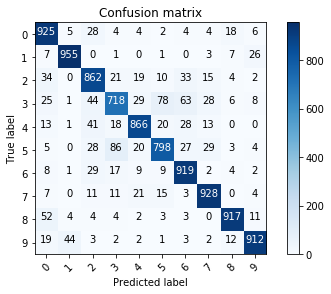

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

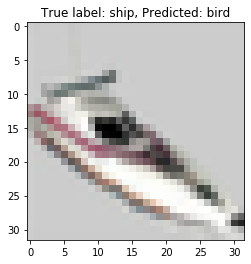

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [16]:
# Now that the model is so large, it's useful to summarie it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 